# Analysis of Instacar Data - Part 1

----
#### 1. Import data file
#### 2. Drop PII Data
#### 3. Analysis by Geographical Areas
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Add and set region of customers
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Grouped bar chart: Region vs Spender Type
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3 Grouped bar chart: Region vs Reorder¶
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.4 Grouped bar chart: Region vs Customer Frequency
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.5 Scatterplot : Income vs Mean Expenses vs Region
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.5.1 Investigate Groups with High Mean_Expenses (more than 10)
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.6 Distribution of Customer Loyalty Types by Region
   #### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.7 Gender Distribution in Regions
#### 4. Exclude customers with low activity 
#### 5. Export Ords Prod Dataframe

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## 1. Import data file

In [3]:
# loading orders_product_cust_types.pkl file into a dataframe
path = r'/Users/patel/Documents/CF-Data Anaylst Course/Achievement-4/Instacart Basket Analysis-Oct 2023/'

df_ords_cust = pd.read_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prods_customers.pkl'))
df_ords_cust.shape

(32404859, 32)

In [4]:
df_ords_cust.head()

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_cust_type,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2550362,1,10,4,8,30.0,13032,8,1,Cinnamon Toast Crunch,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,550135,1,7,1,9,20.0,13032,5,1,Cinnamon Toast Crunch,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [5]:
df_ords_cust[['user_id', 'mean_expenses']].describe()

,mean_expenses
count,3.240486e+07
mean,7.791015e+00
std,1.010321e+00
min,1.000000e+00
25%,7.378489e+00
50%,7.811940e+00
75%,8.229327e+00
max,2.320000e+01


In [6]:
df_ords_cust.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busy_slow_days', 'busiest_hours', 'max_orders', 'loyalty_flag',
       'mean_expenses', 'spender_type', 'median_days_prior_purchase',
       'frequency_cust_type', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

## 2. Drop PII Data

Following columns contain personal identifying data of users. These columns are not required for the analysis, therefore the columns are being dropped

1. first_name
2. last_name

Following columns are dropped because they are not required for the analysis

1. date_joined
2. add_to_cart_order
3. aisle_id

In [7]:
# dropped the columns listed above assigned the dataframe to df_ords_cust_clean
df_ords_cust_clean = df_ords_cust.drop(columns=['first_name', 'last_name', 'date_joined', 'add_to_cart_order', 'aisle_id'])

df_ords_cust_clean.shape

(32404859, 27)

In [8]:
# checking the columns were dropped. columns reduced from 32 to 27
df_ords_cust_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    object 
 1   user_id                     object 
 2   number_of_orders            int8   
 3   orders_days_of_week         int8   
 4   order_hour_of_day           int8   
 5   days_since_prior_order      float32
 6   product_id                  object 
 7   reordered                   int8   
 8   product_name                object 
 9   department_id               int8   
 10  prices                      float32
 11  price_range_loc             object 
 12  busiest_day                 object 
 13  busy_slow_days              object 
 14  busiest_hours               object 
 15  max_orders                  int8   
 16  loyalty_flag                object 
 17  mean_expenses               float32
 18  spender_type                object 
 19  median_days_prior_p

## 3. Analysis by Geographical Areas

### 3.1 Add and set region of customers

In [9]:
# add column 'region' 
# set 'region' as 'Northeast' for any customers that have state as 'Maine, New Hampshire, Vermont, 
# Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey'

df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Maine","New Hampshire", "Vermont", "Massachusetts", 
            "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]), 'region'] = "Northeast"

In [10]:
# set 'region' as 'West' for any customers that have the state as 'Idaho, Montana, Wyoming, Nevada,, Utah, 
# Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii'

df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Idaho", "Montana", "Wyoming", "Nevada", "Utah", 
            "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", 
            "Hawaii"]), 'region'] = "West"

In [11]:
# set 'region' as 'Sowuth' for any customers that have the state as 'Delaware, Maryland, District of Columbia, 
# Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, 
# Alabama, Oklahoma, Texas, Arkansas,, Louisiana'

df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Delaware", "Maryland", "District of Columbia", 
            "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", 
            "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]), 'region'] = "South"


In [12]:
# set 'region' as 'Midwest' for any customers that have the state as 'Wisconsin, Michigan, Illinois, Indiana, 
#Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri'

df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", 
        "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]), 'region'] = "Midwest"

#### Check regions have been assigned accurately

In [13]:
# check the each region exists in the dataframe and there is no skewed count
df_ords_cust_clean[['region']].value_counts(dropna='False')

region   
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
dtype: int64

In [14]:
# Check there are no null values
df_ords_cust_clean['region'].isnull().sum()

0

In [15]:
# check if state corresponds to correct region
df_ords_cust_clean[['region','state']].value_counts(dropna='False').sort_index()

region     state               
Midwest    Illinois                633024
           Indiana                 627282
           Iowa                    625493
           Kansas                  637538
           Michigan                630928
           Minnesota               647825
           Missouri                640732
           Nebraska                625813
           North Dakota            638491
           Ohio                    628319
           South Dakota            633772
           Wisconsin               628108
Northeast  Connecticut             623022
           Maine                   638583
           Massachusetts           646358
           New Hampshire           615378
           New Jersey              627692
           New York                635983
           Pennsylvania            667082
           Rhode Island            656913
           Vermont                 611725
South      Alabama                 638003
           Arkansas                636144
  

### 3.2  Grouped bar chart: Region vs Spender Type

In [16]:
## Count unique users per region vs spender type
region_spender_type = df_ords_cust_clean.groupby(['region','spender_type'], as_index=False).agg({'user_id': 'nunique'})
region_spender_type.to_clipboard()

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Spending of Customers Across Regions')

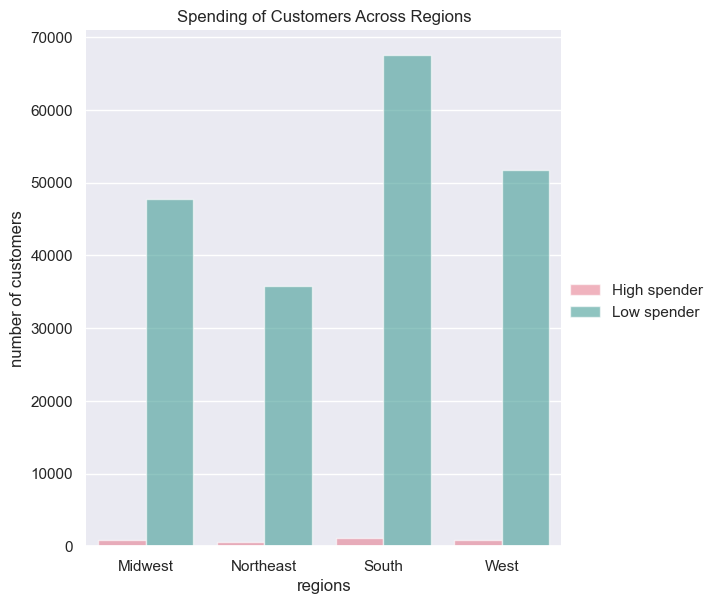

In [17]:
# Grouped bar chart to compare spender types in each region
sns.set_theme()

bar_region_spender = sns.catplot(
    data=region_spender_type, kind="bar",
    x="region", y="user_id", hue="spender_type", palette="husl", alpha=.6, height=6
)
bar_region_spender.despine(left=True)
bar_region_spender.set_axis_labels("regions", "number of customers")
bar_region_spender.legend.set_title("")
plt.title("Spending of Customers Across Regions")

#### Observations:

1. Majority of the customers are located in the Southern states
2. All regions have significantly high number of low spenders
3. There is minimum difference of high spenders between regions

In [18]:
bar_region_spender.savefig(os.path.join(path, 
                        '04 Analysis/Visualizations/bar_region_spender.png'))

### 3.3  Grouped bar chart: Region vs Reorder

In [19]:
## Count unique users per region vs reorder
region_reorder_type = df_ords_cust_clean.groupby(['region','reordered'], as_index=False).agg({'user_id': 'nunique'})
region_reorder_type

,region,reordered,user_id
0,Midwest,0,48519
1,Midwest,1,47802
2,Northeast,0,36388
3,Northeast,1,35851
4,South,0,68737
5,South,1,67750
6,West,0,52565
7,West,1,51748


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Regional Breakdown of Reorders and Single-Time Orders')

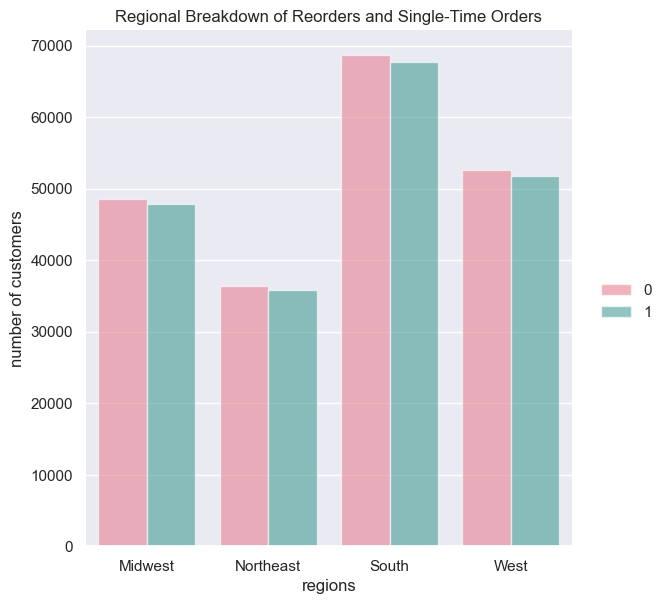

In [20]:
# Grouped bar chart to compare spender types in each region
sns.set_theme()

bar_region_reorder = sns.catplot(
    data=region_reorder_type, kind="bar",
    x="region", y="user_id", hue="reordered", palette="husl", alpha=.6, height=6
)
bar_region_reorder.despine(left=True)
bar_region_reorder.set_axis_labels("regions", "number of customers")
bar_region_reorder.legend.set_title("")
plt.title("Regional Breakdown of Reorders and Single-Time Orders")

In [21]:
bar_region_reorder.savefig(os.path.join(path, 
                        '04 Analysis/Visualizations/bar_region_reorder.png'))

### 3.4  Grouped bar chart: Region vs Customer Frequency

In [22]:
## Count unique users per region vs customer frequency
region_reorder_cust_freq = df_ords_cust_clean.groupby(['region','frequency_cust_type'], as_index=False).agg({'user_id': 'nunique'})
region_reorder_cust_freq

,region,frequency_cust_type,user_id
0,Midwest,Frequent customer,20278
1,Midwest,Non-frequent customer,14063
2,Midwest,Regular customer,14178
3,Northeast,Frequent customer,15272
4,Northeast,Non-frequent customer,10444
5,Northeast,Regular customer,10672
6,South,Frequent customer,28867
7,South,Non-frequent customer,19934
8,South,Regular customer,19935
9,West,Frequent customer,22179


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Regional Breakdown of Customer Frequency')

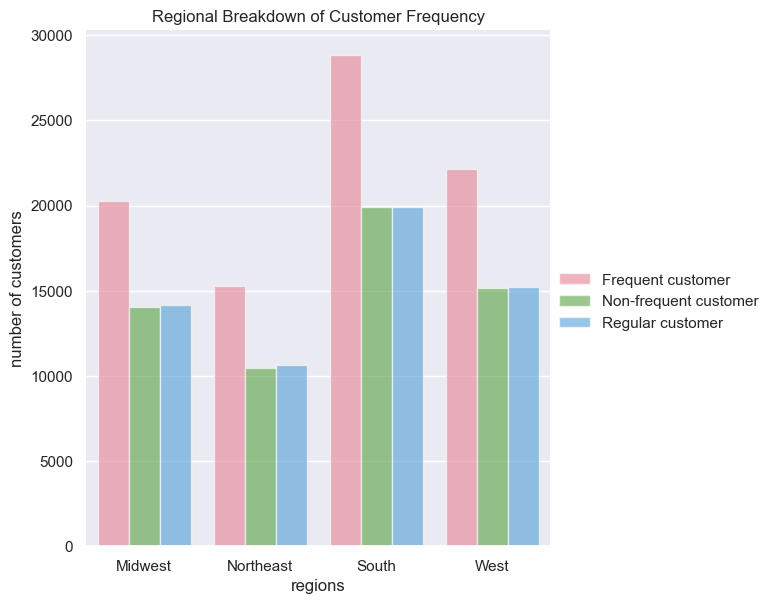

In [23]:
# Grouped bar chart to compare spender types in each region
sns.set_theme()

bar_region_frequency = sns.catplot(
    data=region_reorder_cust_freq, kind="bar",
    x="region", y="user_id", hue="frequency_cust_type", palette="husl", alpha=.6, height=6
)
bar_region_frequency.despine(left=True)
bar_region_frequency.set_axis_labels("regions", "number of customers")
bar_region_frequency.legend.set_title("")
plt.title("Regional Breakdown of Customer Frequency")

### 3.5 Scatterplot : Income vs Mean Expenses vs Region

In [24]:
region_mean_exp = df_ords_cust_clean[['user_id', 'region', 'income', 'mean_expenses']]
region_mean_exp.drop_duplicates(inplace=True)
region_mean_exp

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_10963/606442029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_mean_exp.drop_duplicates(inplace=True)


,user_id,region,income,mean_expenses
0,1,South,40423,6.367796
59,10,South,52716,8.651049
202,100,South,138741,9.859260
229,1000,South,63581,8.407767
332,10000,South,61257,8.045422
...,...,...,...,...
32404295,99995,Midwest,92882,7.958000
32404345,99996,Midwest,107293,7.410937
32404473,99997,South,71271,7.958333
32404509,99998,Midwest,98951,9.052381


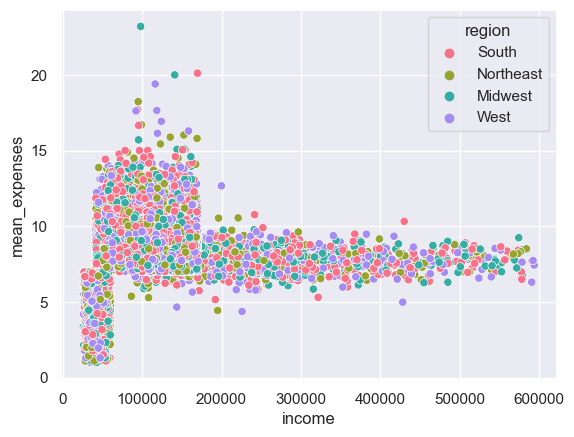

In [25]:
# scatterplot income vs mean expenses, region category by color
scatter_region_expenses = sns.scatterplot(data=region_mean_exp, x="income", y="mean_expenses", 
                                          hue="region", palette="husl")

#### Observations:

1. There is no relationship between region, income and mean expenses
2. There is a higer distribution of expenses within customers with income less than 180,000

#### 3.5.1 Investigate Groups with High Mean_Expenses (more than 10)

In [26]:
high_mean_expenses = df_ords_cust_clean.loc[df_ords_cust_clean['spender_type'] == 'High spender']
high_mean_expenses

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,spender_type,median_days_prior_purchase,frequency_cust_type,gender,state,age,n_dependants,fam_status,income,region
4175,1957404,100014,3,3,19,26.0,25890,1,Boneless Skinless Chicken Breasts,12,...,High spender,10.0,Frequent customer,Male,Arizona,37,1,married,83132,West
4176,2035935,100014,1,2,18,NaN,2855,0,Organic Good Seed Bread,3,...,High spender,10.0,Frequent customer,Male,Arizona,37,1,married,83132,West
4177,2035935,100014,1,2,18,NaN,18465,0,Organic Grade A Free Range Large Brown Eggs,16,...,High spender,10.0,Frequent customer,Male,Arizona,37,1,married,83132,West
4178,2025474,100014,2,5,18,10.0,18465,1,Organic Grade A Free Range Large Brown Eggs,16,...,High spender,10.0,Frequent customer,Male,Arizona,37,1,married,83132,West
4179,1957404,100014,3,3,19,26.0,2855,1,Organic Good Seed Bread,3,...,High spender,10.0,Frequent customer,Male,Arizona,37,1,married,83132,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32403377,488363,99988,5,6,9,30.0,46149,1,Zero Calorie Cola,7,...,High spender,22.0,Non-frequent customer,Female,North Carolina,45,0,single,165397,South
32403378,488363,99988,5,6,9,30.0,21386,1,Smartwater,7,...,High spender,22.0,Non-frequent customer,Female,North Carolina,45,0,single,165397,South
32403379,251255,99988,4,2,12,15.0,46149,1,Zero Calorie Cola,7,...,High spender,22.0,Non-frequent customer,Female,North Carolina,45,0,single,165397,South
32403380,1044470,99988,6,5,15,20.0,21386,1,Smartwater,7,...,High spender,22.0,Non-frequent customer,Female,North Carolina,45,0,single,165397,South


In [27]:
stats_highexp = high_mean_expenses.groupby('fam_status').agg({'user_id': pd.Series.nunique, 
                                            'income': ['min', 'max', 'mean', 'median']})

In [28]:
stats_highexp = stats_highexp.reset_index()

In [29]:
stats_highexp

fam_status user_id income                         \
                                    nunique    min     max           mean   
0                  divorced/widowed     282  61577  430161  125755.105482   
1  living with parents and siblings     163  42294  101149   72514.336844   
2                           married    2327  41746  220987  107150.741129   
3                            single     617  41933  241645  102235.049067   

             
     median  
0  121446.0  
1   73655.0  
2  103702.0  
3   96705.0

#### Observations

1. Majority of high spenders are married that have max income of $220,987
2. Smallest percentage of customers that are high spenders are living with parents and sibling

### 3.6 Distribution of Customer Loyalty Types by Region

In [30]:
## Count unique users per fam_status
region_loyalty = df_ords_cust_clean.groupby(['region','loyalty_flag'], as_index=False).agg({'user_id': 'nunique'})
region_loyalty

,region,loyalty_flag,user_id
0,Midwest,Loyal customer,3991
1,Midwest,New customer,26333
2,Midwest,Regular customer,18195
3,Northeast,Loyal customer,3027
4,Northeast,New customer,19869
5,Northeast,Regular customer,13492
6,South,Loyal customer,5637
7,South,New customer,37491
8,South,Regular customer,25609
9,West,Loyal customer,4362


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Customers Types by Region')

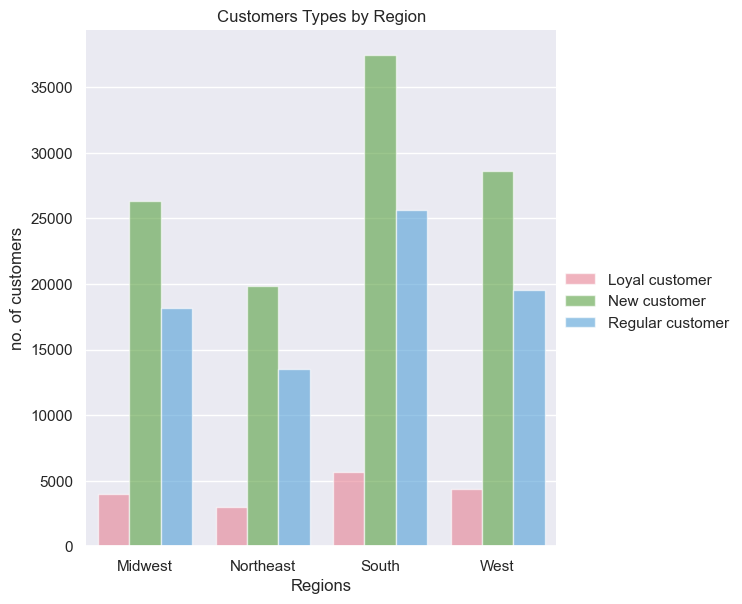

In [31]:
# Grouped bar chart to compare spender types in each region
sns.set_theme()

bar_region_loyalty = sns.catplot(
    data=region_loyalty, kind="bar",
    x="region", y="user_id", hue="loyalty_flag", palette="husl", alpha=.6, height=6
)
bar_region_loyalty.despine(left=True)
bar_region_loyalty.set_axis_labels("Regions", "no. of customers")
bar_region_loyalty.legend.set_title("")
plt.title("Customers Types by Region")

#### Observations:

1. As expected, significnat number of customers are based in southern states
2. In all regions, higher proportion of customers are new
3. Southern states have the most loyalty customers. 

In [32]:
bar_region_loyalty.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_region_loyalty.png'))

### 3.7  Gender Distribution in Regions

In [33]:
## Count unique users per fam_status
region_gender = df_ords_cust_clean.groupby(['region','gender'], as_index=False).agg({'user_id': 'nunique'})
region_gender 

,region,gender,user_id
0,Midwest,Female,24182
1,Midwest,Male,24337
2,Northeast,Female,17766
3,Northeast,Male,18622
4,South,Female,34047
5,South,Male,34690
6,West,Female,26147
7,West,Male,26418


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gender Distribution by Region')

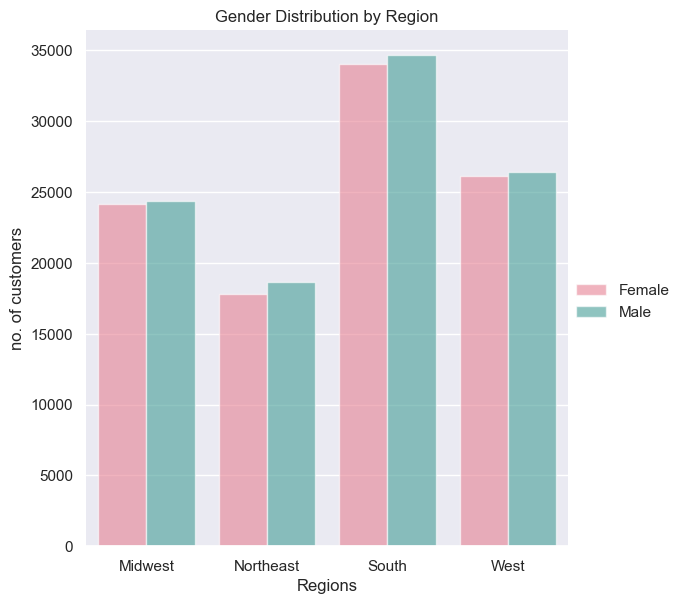

In [34]:
# Grouped bar chart to compare spender types in each region
sns.set_theme()

bar_region_gender = sns.catplot(
    data=region_gender, kind="bar",
    x="region", y="user_id", hue="gender", palette="husl", alpha=.6, height=6
)
bar_region_gender.despine(left=True)
bar_region_gender.set_axis_labels("Regions", "no. of customers")
bar_region_gender.legend.set_title("")
plt.title("Gender Distribution by Region")

#### Observations

1. Almost equal distribution of gender in all regions. Male customers is slightly more in all regions

## 4. Exclude customers with low activity

In [35]:
df_ords_cust_clean.loc[(df_ords_cust_clean['max_orders'] < 5), 'activity_type'] = "Low activity"
df_ords_cust_clean.loc[(df_ords_cust_clean['max_orders'] >= 5), 'activity_type'] = "High activity"

In [36]:
df_ords_cust_clean['activity_type'].value_counts(dropna=False)

High activity    30964564
Low activity      1440295
Name: activity_type, dtype: int64

In [37]:
df_high_active_cust = df_ords_cust_clean.loc[(df_ords_cust_clean['activity_type'] == "High activity")]

In [38]:
df_high_active_cust.to_pickle(os.path.join(path, '02 Data/Prepared Data/high_active_cust.pkl'))

## 5. Export Ords Prod Dataframe

In [39]:
df_ords_cust_clean.to_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prod_cust_without_pii.pkl'))